# Part 1: Import Libraries

In [100]:
import pandas as pd
from scipy.stats import skew, kurtosis, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Part 2: Create DataFrame

In [107]:
data = {
    "Student_ID": range(1, 21),
    "Group": ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'A', 'B', 'C', 'A', 'B'],
    "Score": [65, 70, 75, 72, 68, 85, 78, 80, 90, 88, 50, 55, 60, 58, 62, 73, 82, 53, 67, 87]
}

df = pd.DataFrame(data)

# Part 3: Calculate Skewness and Kurtosis

In [113]:
skewness = skew(df['Score'])
kurt = kurtosis(df['Score'], fisher=False)

print(f"Skewness of Scores: {skewness:.4f}")
print(f"Kurtosis of Scores: {kurt:.4f}")

Skewness of Scores: -0.0541
Kurtosis of Scores: 1.8937


# Part 4: Stem-and-Leaf Plot Function

In [126]:
def stem_and_leaf(scores):
    stems = {}
    for score in scores:
        stem, leaf = divmod(score, 10)
        stems.setdefault(stem, []).append(leaf)
    
    stem_and_leaf_result = []
    for stem, leaves in sorted(stems.items()):
        stem_and_leaf_result.append(
            f"{stem} | {' '.join(map(str, sorted(leaves)))}"
        )
    
    return "\n".join(stem_and_leaf_result)

print("Stem-and-Leaf Plot")
print(stem_and_leaf(df['Score']))

Stem-and-Leaf Plot
5 | 0 3 5 8
6 | 0 2 5 7 8
7 | 0 2 3 5 8
8 | 0 2 5 7 8
9 | 0


# Part 5: Visualizations

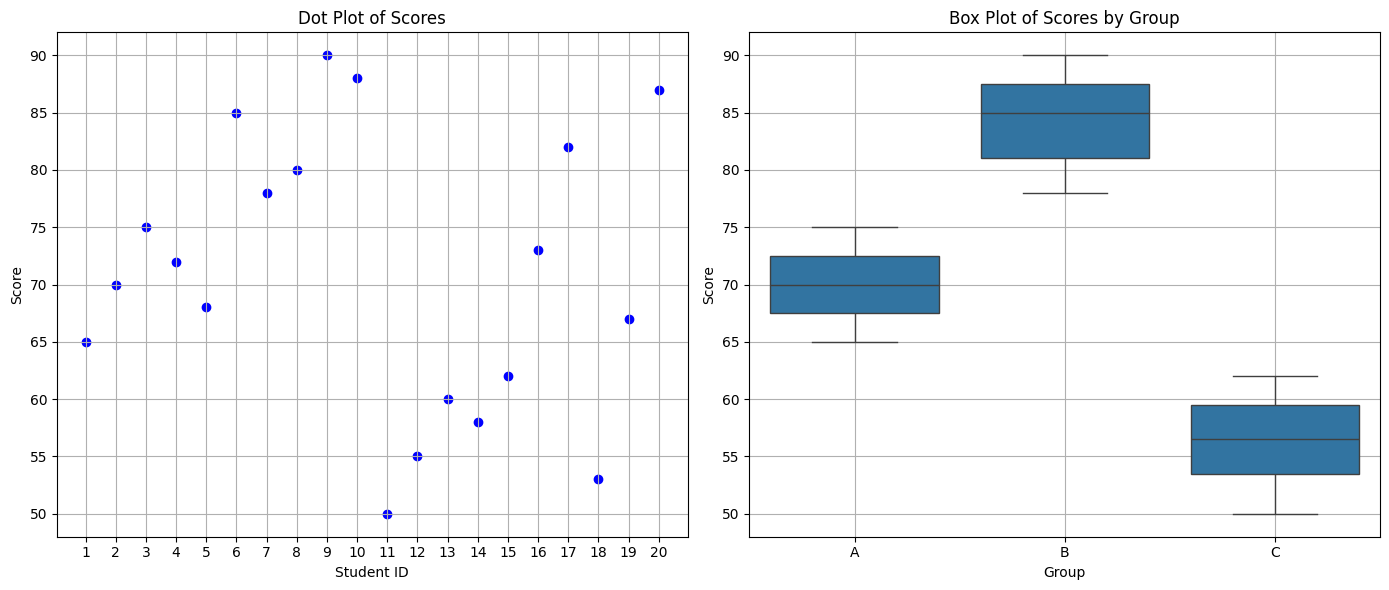

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(df['Student_ID'], df['Score'], color='blue', label='Scores')
axes[0].set_title("Dot Plot of Scores")
axes[0].set_xlabel("Student ID")
axes[0].set_ylabel("Score")
axes[0].grid(True)
axes[0].set_xticks(df['Student_ID'])

sns.boxplot(x='Group', y='Score', data=df, ax=axes[1])
axes[1].set_title("Box Plot of Scores by Group")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Part 6: Perform ANOVA Test

In [ ]:
group_a = df[df['Group'] == 'A']['Score']
group_b = df[df['Group'] == 'B']['Score']
group_c = df[df['Group'] == 'C']['Score']

f_stat, p_value = f_oneway(group_a, group_b, group_c)

print(f"\nANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")


ANOVA Test Results:
F-statistic: 73.0448
P-value: 0.0000


# Part 7: Interpretation of ANOVA Test

In [ ]:
if p_value < 0.05:
    print("There is a significant difference between groups (p < 0.05).")
else:
    print("There is no significant difference between groups (p >= 0.05).")

There is a significant difference between groups (p < 0.05).
